<a href="https://colab.research.google.com/github/nitesh648singh/Earthquake-prediction-model/blob/main/Chat_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/chat_dataset.csv')
df

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative
...,...,...
579,I have to cancel my vacation plans because I c...,negative
580,My computer crashed and I lost all my importan...,negative
581,I got into a car accident and my car is totale...,negative
582,I have a cold and can't stop coughing. it's re...,negative


In [ ]:
df.groupby('sentiment').describe()

message                                        
            count unique                         top freq
sentiment                                                
negative      147    142   I wouldn't recommend this    3
neutral       259    232   I have no opinion on this    5
positive      178    172  I really enjoyed the movie    2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['sentiment'], random_state=42)
X_train.shape, X_test.shape

((438,), (146,))

In [ ]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
model1 = BernoulliNB()
model1.fit(X_train_cv, y_train)

BernoulliNB()

In [ ]:
bsc = model1.score(X_test_cv, y_test)
bsc

0.7328767123287672

In [ ]:
model2 = MultinomialNB()
model2.fit(X_train_cv, y_train)

MultinomialNB()

In [ ]:
mnb = model2.score(X_test_cv, y_test)
mnb

0.8287671232876712

In [ ]:
model3 = GaussianNB()
model3.fit(X_train_cv.toarray(), y_train)

GaussianNB()

In [ ]:
gnb = model3.score(X_test_cv.toarray(), y_test)
gnb

0.8082191780821918

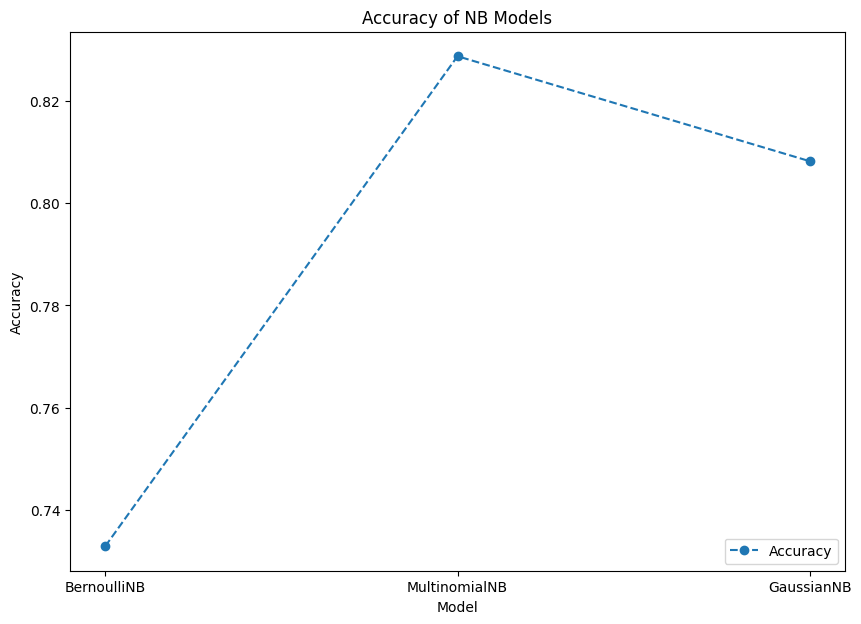

In [ ]:
plt.figure(figsize=(10, 7))
scores = [bsc, mnb, gnb]
plt.plot(scores, marker='o', linestyle='dashed')
plt.xticks([0, 1, 2], ['BernoulliNB', 'MultinomialNB', 'GaussianNB'])
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy of NB Models')
plt.legend(['Accuracy'], loc='lower right')
plt.show()

In [ ]:
+2999999999-a--*----

In [ ]:
texts = ['I got into a car accident and my car is !']
text_cv = cv.transform(texts)
for i in range(len(texts)):
    print(texts[i],": ",model2.predict(text_cv[i])[0])

I got into a car accident and my car is ! :  negative
